## Counting Labels of Deeplabcut

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [3]:
projectPath='/home/motorns/Documents/work/hoffman/WhiteRabbit-Chrissy-2020-03-18'
labelDirectory='labeled-data/chrissyproject'
labelFile='CollectedData_Chrissy.csv'

In [4]:
os.chdir(projectPath)

### Loading the csv file and dropping bodyparts column with frame names

In [5]:
labelResults = pd.read_csv(os.path.join(labelDirectory,labelFile),header=1)
labelResults = labelResults.drop('bodyparts',axis=1)

### Getting rid of repeat columns ending with .1 (for y axis). Melting the data frame so column names are rows. Finally, dropping na values for accurate value counts.

In [6]:
labelResults = labelResults.loc[:,~labelResults.columns.str.contains('.1')]
timesLabeled = pd.melt(labelResults,value_name='xcoord',var_name='bodypart').dropna()

### Generating the countplot with Seaborn.

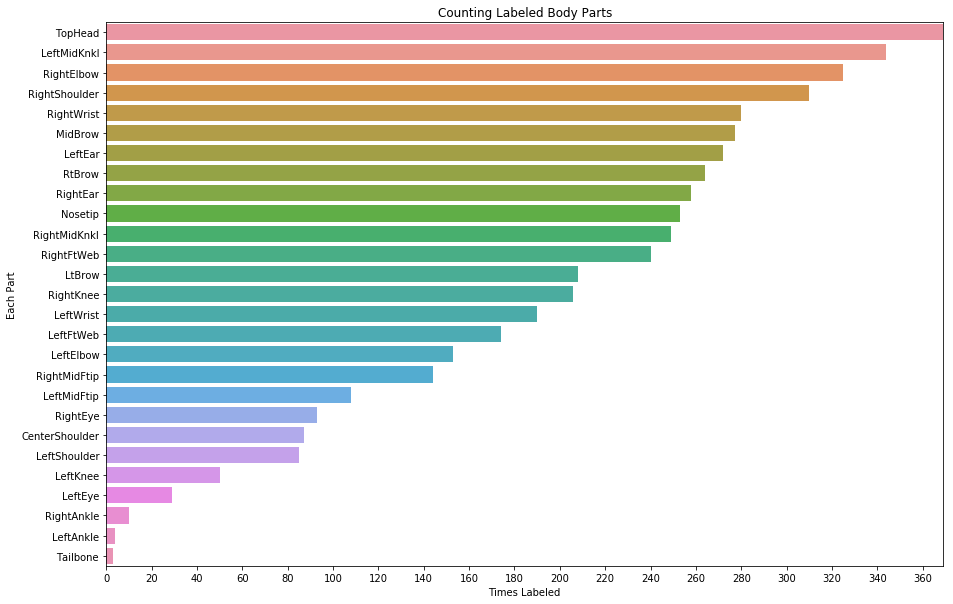

In [7]:
plt.figure(figsize=(15,10));
ax = sns.countplot(data=timesLabeled,y='bodypart',order=timesLabeled.bodypart.value_counts().index);
xlength=timesLabeled.bodypart.value_counts().max()
ax.set_title("Counting Labeled Body Parts")
ax.set_xlabel("Times Labeled")
ax.set_ylabel("Each Part")
ax.set_xticks(np.arange(0,xlength,step=20));
plt.xlim(0,xlength);